Up next

- add button to remove last annotation
- save annotations

<IPython.core.display.Javascript object>


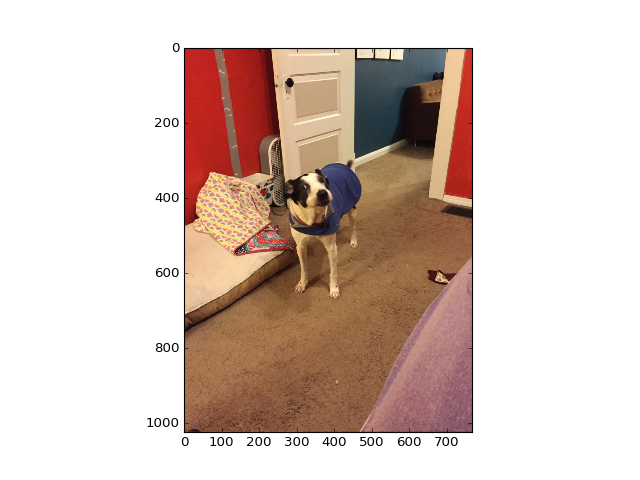

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
import matplotlib.image as mpimg
import cv2
from IPython.display import clear_output

import os

class Annotate(object):
    def __init__(self,**args):        
        self.ax = plt.gca()
        self.linewidth = 3  
        self.color = 'm'

        # initalize corner point containers
        self.corner_pts = []

        # plot gray image in annotation area
        imgpath = args['imgpath']
        
        # create list of images to annotate
        self.imgs = os.listdir(imgpath) # returns list
        self.imgs = [imgpath + '/'+ s for s in self.imgs]
        self.count = 0
        
        # setup first image to annotate
        self.annotate_image()
    
    # annotate next image
    def annotate_image(self):
        # load in image and plot
        self.load_image(imgpath=self.imgs[self.count])
        self.ax.set_ylim([np.shape(np.asarray(self.gray))[0],0])
        self.ax.set_xlim([0,np.shape(np.asarray(self.gray))[1]])
        self.ax.imshow(self.img)
        
        # initalize interactive plot
        self.initialize_interactive()
        
    # initialize interactive plot
    def initialize_interactive(self):
        # boolean for mouse motion
        self.is_pressed = False
        
        # initial rectangle and corner points 
        self.rect = Rectangle((0,0), 0, 0,fill=False,color = self.color,linewidth=self.linewidth)
        self.x0 = None
        self.y0 = None
        self.x1 = None
        self.y1 = None
        
        # initialize figure
        self.ax.add_patch(self.rect)
        
        # initialize event handeling
        self.ax.figure.canvas.mpl_connect('button_press_event', self.on_press)
        self.ax.figure.canvas.mpl_connect('button_release_event', self.on_release)
        self.ax.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)
        self.ax.figure.canvas.mpl_connect('key_press_event', self.key_press)
    
    # load in image and plot
    def load_image(self,imgpath):
        # load in image
        self.img = mpimg.imread(imgpath)
        
        # create grayscale version for annotating
        self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
    
    ##### plotting functions #####
    # show image
    def show_image(self):
        # plot image
        fig = plt.figure(figsize = (16,5))
        ax = fig.add_subplot(111)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(self.img)
        plt.show()
    
    # initialize interactive plot
    def initialize_annotator(self):
        self.ax.imshow(self.gray,cmap = 'gray')
        plt.show()
        
    # drawing all rectangles
    def draw_all_recs(self):
        # draw each rectangle selected so far
        for rec in self.corner_pts:
            x0 = rec[0][0]
            y0 = rec[0][1]
            x1 = rec[1][0]
            y1 = rec[1][1]
            
            s = np.linspace(x0,x1)
            t = np.linspace(y0,y1)
            os = np.ones((len(s)))
            ot = np.ones((len(t)))
            
            self.ax.plot([x0,x0],[y0,y1],c = self.color,linewidth = self.linewidth)
            self.ax.plot([x1,x1],[y0,y1],c = self.color,linewidth = self.linewidth)
            self.ax.plot([x0,x1],[y0,y0],c = self.color,linewidth = self.linewidth)
            self.ax.plot([x0,x1],[y1,y1],c = self.color,linewidth = self.linewidth)
        
    #### event handeling ####
    # mouse press event
    def on_press(self, event):        
        self.is_pressed = True
        self.x0 = int(round(event.xdata))
        self.y0 = int(round(event.ydata))

    # mouse release event
    def on_release(self, event):
        # update current points while
        self.is_pressed = False
        self.x1 = int(round(event.xdata))
        self.y1 = int(round(event.ydata))
        self.rect.set_width((self.x1 - self.x0))
        self.rect.set_height((self.y1 - self.y0))
        self.rect.set_xy((self.x0, self.y0))
        
        # record new points
        self.corner_pts.append([[self.x0,self.y0],[self.x1,self.y1]])
        
        # plot all rectangles
        self.draw_all_recs()
        
    # on mouse motion event
    def on_motion(self,event):
        if self.is_pressed == True:
            blah = 0
            self.x1 = int(round(event.xdata))
            self.y1 = int(round(event.ydata))
            self.rect.set_width(self.x1 - self.x0)
            self.rect.set_height(self.y1 - self.y0)
            self.rect.set_xy((self.x0, self.y0))
            
    # key event to move to next image in directory or close       
    def key_press(self,event):

        if event.key == 'enter':
            self.count+=1
            self.annotate_image()
        
    #### save data ####
    # function to save the data
    def save_data(self,csvname):
        # save the dataset you made above
        x = np.asarray(self.xs)
        x.shape = (len(x),1)

        y = np.asarray(self.ys)
        y.shape = (len(y),1)

        c = np.concatenate([x,y],axis = 1)
        d = pd.DataFrame(c)
        d.to_csv(csvname,index = False,header = None)
        
%matplotlib notebook
a = Annotate(imgpath = 'images')
# plt.show()
